# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Akhil Morampudi </font>

# Introduction

The objective of this assignment is to train our linear regression model using <b> Least Squares,Least mean squares </b> algorithm and analyze the performance of both algorithms.   
  
<font color = 'blue'><b>Steps to accomplish this:</b></font>    
1. Download a dataset and introduce it  
2. PreProcessing and visualization of the dataset
3. Divide the dataset into two sets, Training Dataset & Test Dataset
4. Write code for the algorithms Least Squares & Least Mean Squares 
5. Apply the above algorithms to our data model using the training dataset
6. Test the performance of the model using test dataset


# Data  
## Introduction of Data for Regression
### DataSet information:  
<b>House Sales in King County, USA from Kaggle.</b>  
This dataset contains house sale prices for King County. It has the information of the houses sold between the years May 2014 and May 2015.
  
### Source of the Data:  
https://www.kaggle.com/harlfoxem/housesalesprediction   
  
### Highlights:  
#### Attributes:
It contains a total of 21 columns. This dataset contains 19 house features ,id column and a target variable price which indicates the price for which the house was sold.   
#### Class Label:  
The prediction task is to determine the price of a house from a given list of input features. 

### Attribute description:
<p>
1. id : A unique identifier for the house <br/>
2. date : The Date house was sold<br/>
3. price : Price is prediction target<br/>
4. bedrooms : Number of Bedrooms/House<br/>
5. bathrooms : Number of bathrooms/bedrooms<br/>
6. sqft_living : square footage of the home<br/>
7. sqft_lot : square footage of the lot<br/>
8. floors : Total floors (levels) in house<br/>
9. waterfront : House which has a view to a waterfront<br/>
10. view : Has been viewed<br/>
11. condition : How good the condition is ( Overall )<br/>
12. grade : overall grade given to the housing unit, based on King County grading system<br/>
13. sqft_above : square footage of house apart from basement<br/>
14. sqft_basement : square footage of the basement<br/>
15. yr_built : Built Year<br/>
16. yr_renovated : Year when house was renovated<br/>
17. zipcode : zip<br/>
18. lat : Latitude coordinate<br/>
19. long : Longitude coordinate<br/>
20. sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area<br/>
21. sqft_lot15 : lotSize area in 2015<br/> </p>

## Reading the data

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
df_homeprice = pd.read_csv('DataSet/kc_house_data.csv')

In [3]:
df_homeprice.shape

(21613, 21)

In [4]:
pd.set_option('display.max_columns',None)
df_homeprice.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [5]:
df_homeprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


<b>Observation:</b>  
With the above information,columns bathrooms,floors are of float datatype. As floors and bathrooms cannot be in fractions, it needs to be adjusted in the data pre-processing step

In [6]:
df_homeprice.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Visualization of the data

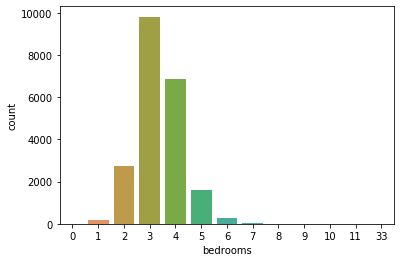

In [7]:
sns.countplot(x = 'bedrooms', data = df_homeprice)

<Figure size 1008x1008 with 0 Axes>

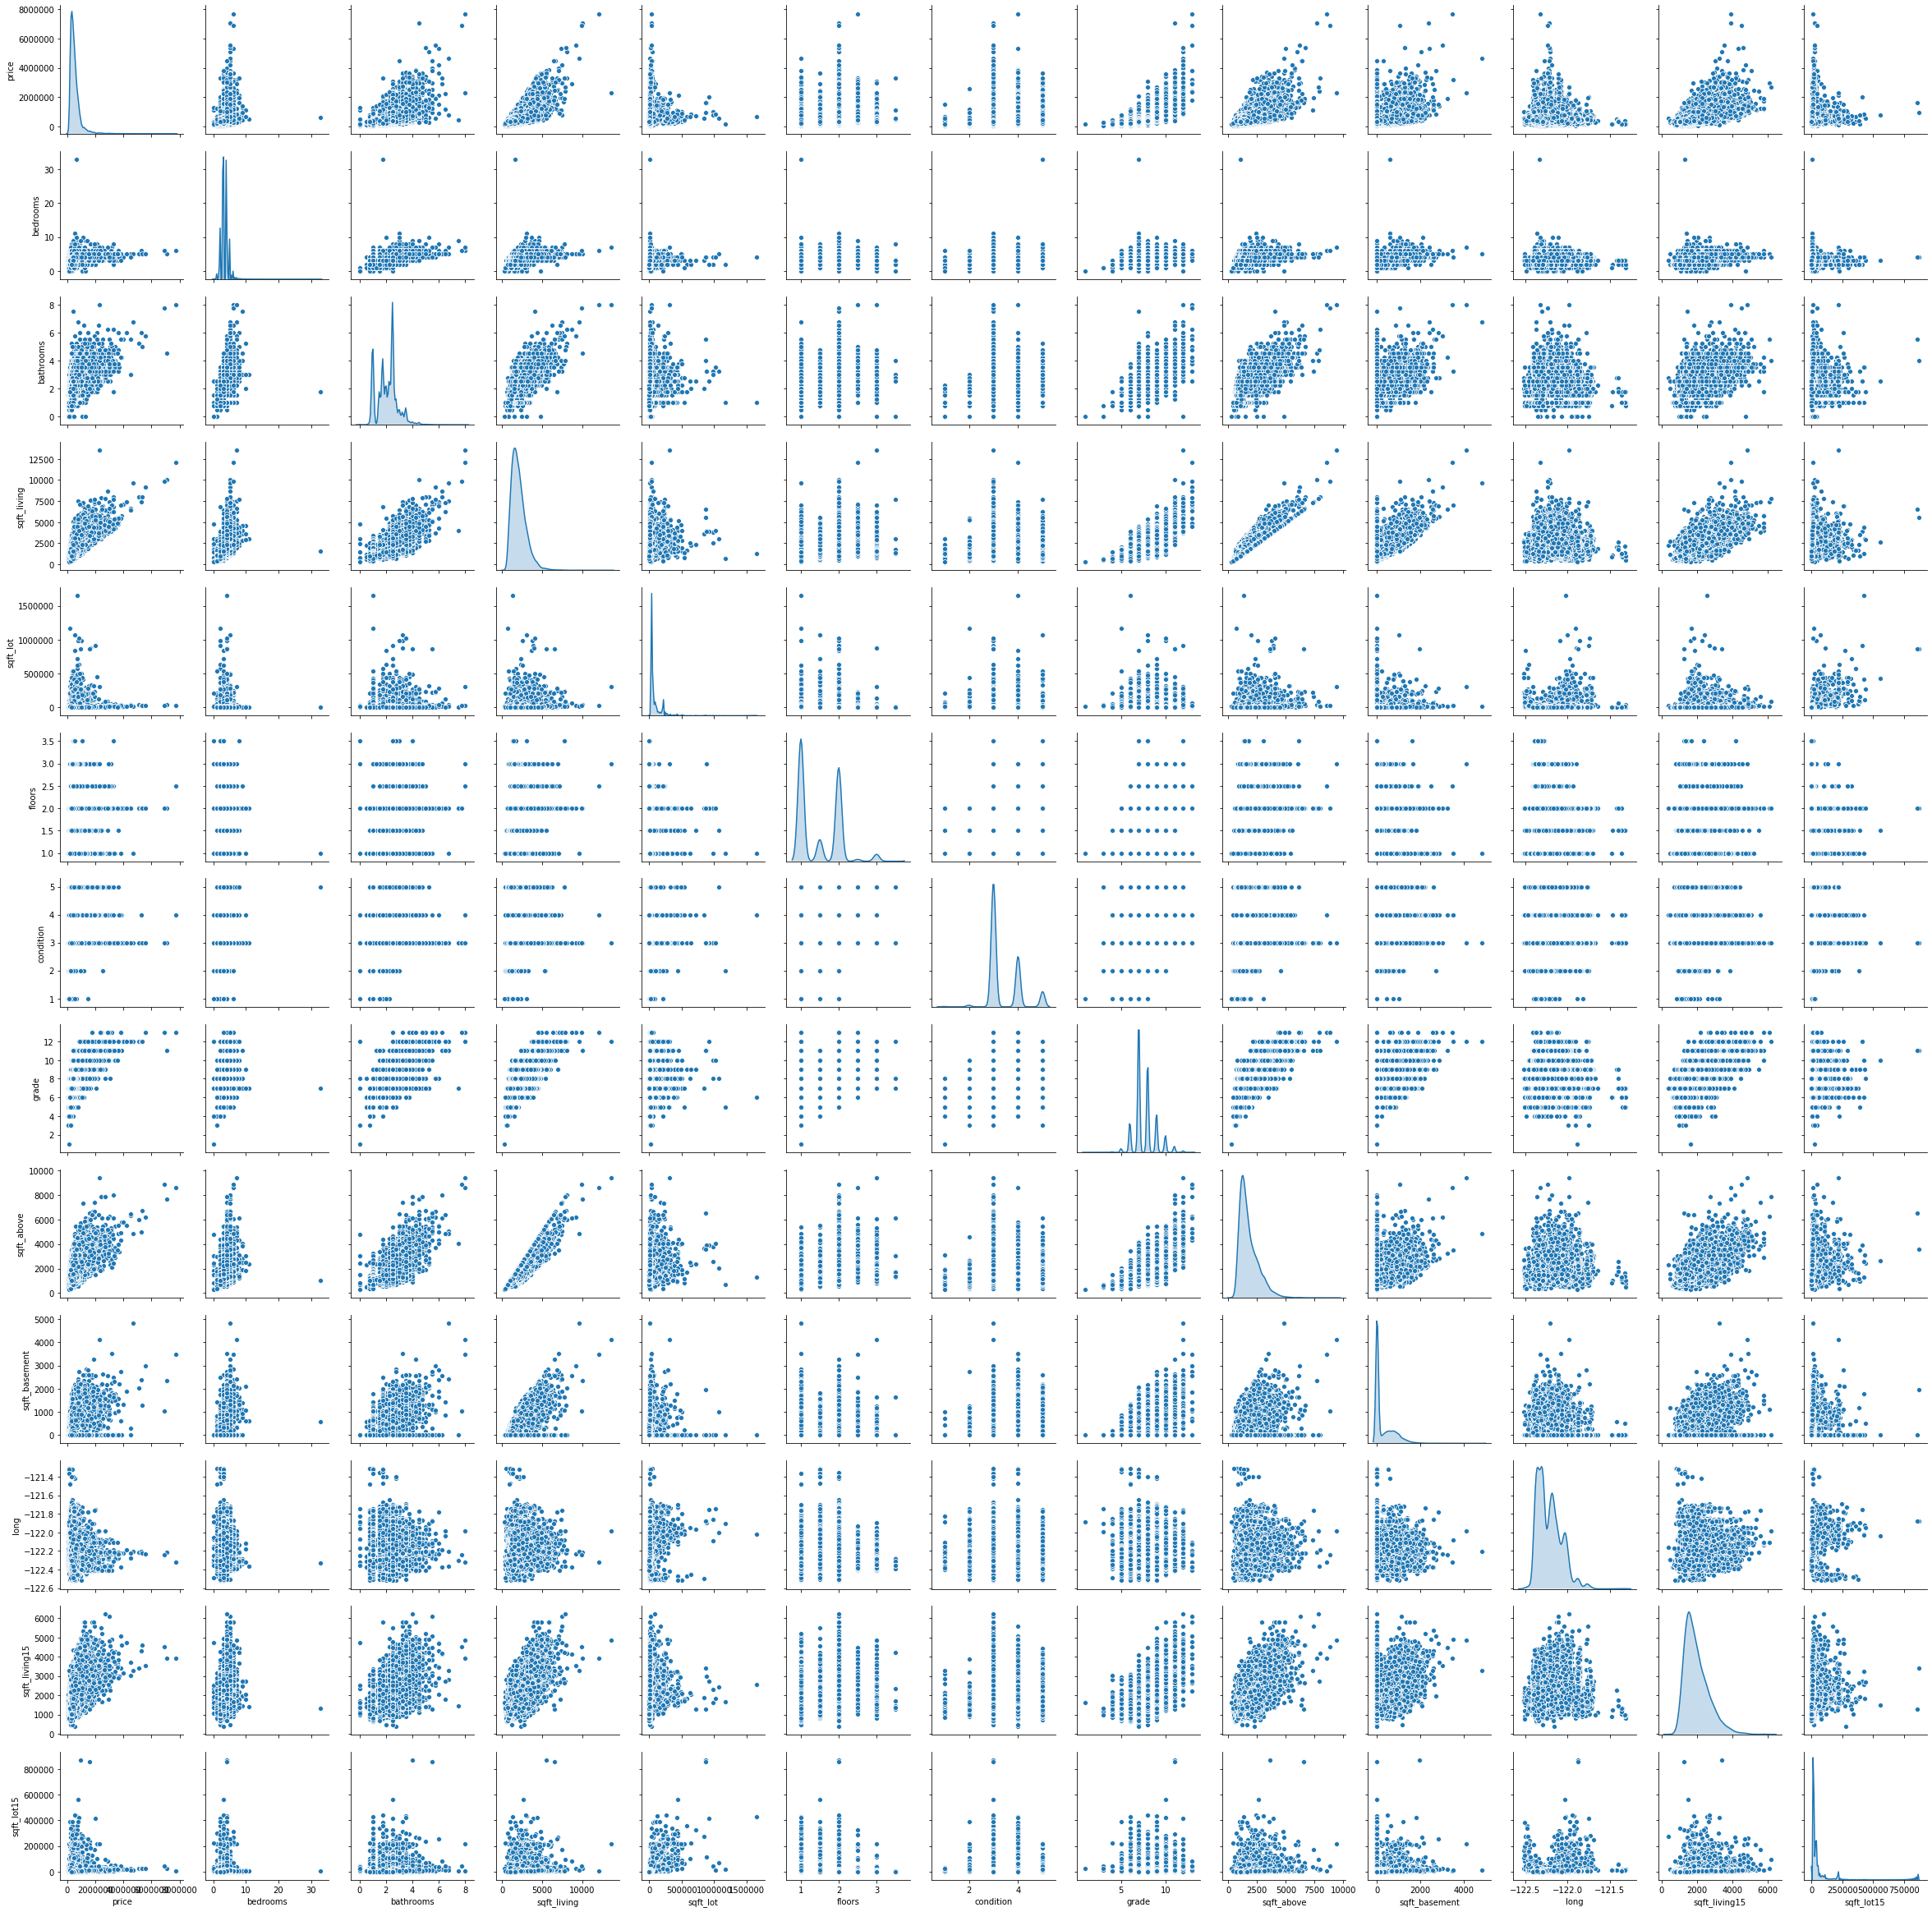

In [8]:
# PairGrid Plot
plt.figure(figsize=(14, 14))

sns.pairplot(df_homeprice.drop(['id','date','lat','waterfront','view','zipcode','yr_renovated','yr_built'],axis = 1), diag_kind='kde')

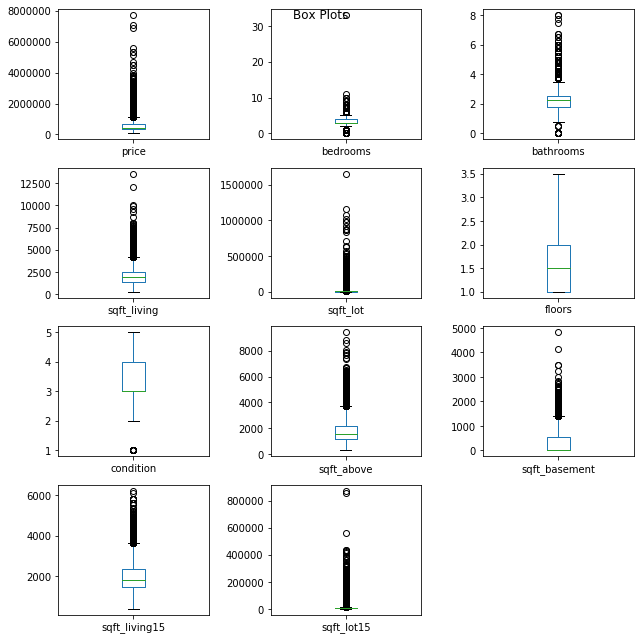

In [9]:
df_homeprice.drop(['id','date','waterfront','view','grade','yr_built','zipcode','lat','long','yr_renovated'],axis = 1).plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plots')
plt.tight_layout()

<b>Observation:</b>  
With the above box plots. It is clearly visible that the price ,bedrooms, bathrooms , sqft_living , sqft_lot columns have a lot of outliers present in them.

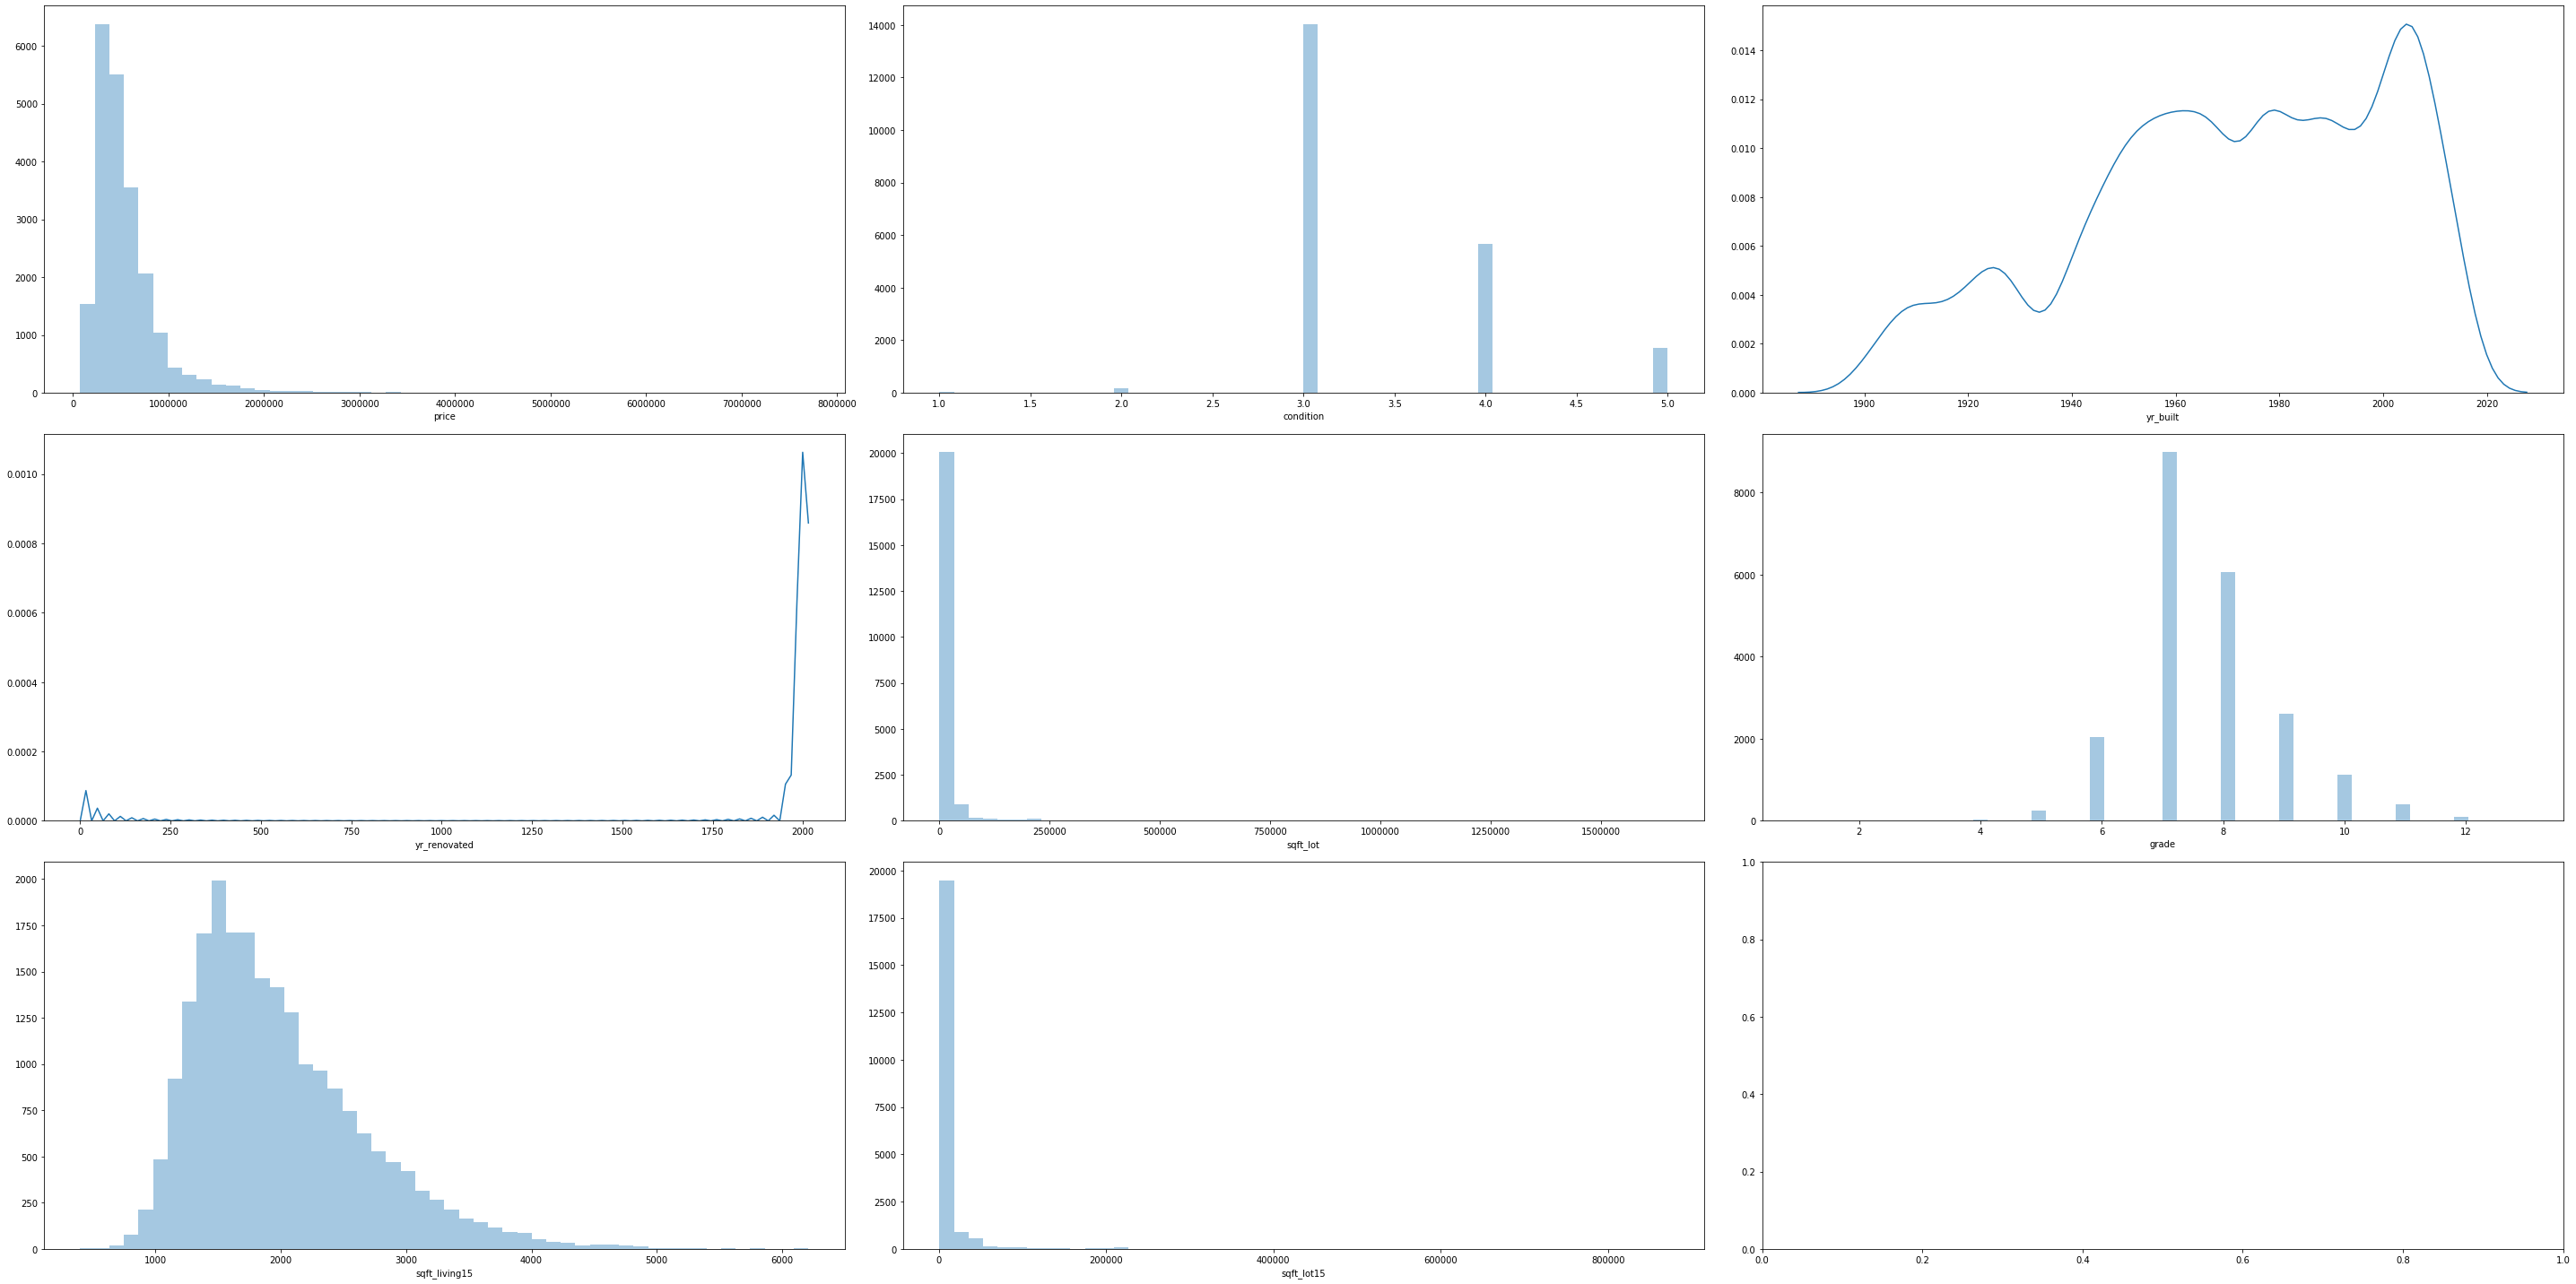

In [10]:
# Distplots of some columns
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(40,20))
sns.distplot(df_homeprice['price'], kde=False,ax = ax[0][0])
sns.distplot(df_homeprice['condition'], kde = False, ax = ax[0][1])
sns.distplot(df_homeprice['yr_built'], hist = False, ax = ax[0][2])
sns.distplot(df_homeprice['yr_renovated'], hist = False, ax = ax[1][0])
sns.distplot(df_homeprice['sqft_lot'], kde = False, ax = ax[1][1])
sns.distplot(df_homeprice['grade'], kde = False, ax = ax[1][2])
sns.distplot(df_homeprice['sqft_living15'], kde = False, ax = ax[2][0])
sns.distplot(df_homeprice['sqft_lot15'], kde = False, ax = ax[2][1])

plt.tight_layout()

<b>Observation:</b>  
- The price is right skewed due to the precense of outliers.  
- The condition of houses is in between 3 and 4.  
- Since, most of the houses have been sold in the year 2000, they might have been renovated in years around 2000 which is indicated by the steep peak in the yr_renovated graph.  
- The sqft_lot column has a lot of zeroes, so this column might not be useful for prediction.  
- Most of the houses have grade in between 6 to 8.  
- Most of sqft_living15 colums values lie in the range of 900 to 3000    - Most of the values of sqft_lot15 are zeroes. So, this column might not be useful for prediction. 

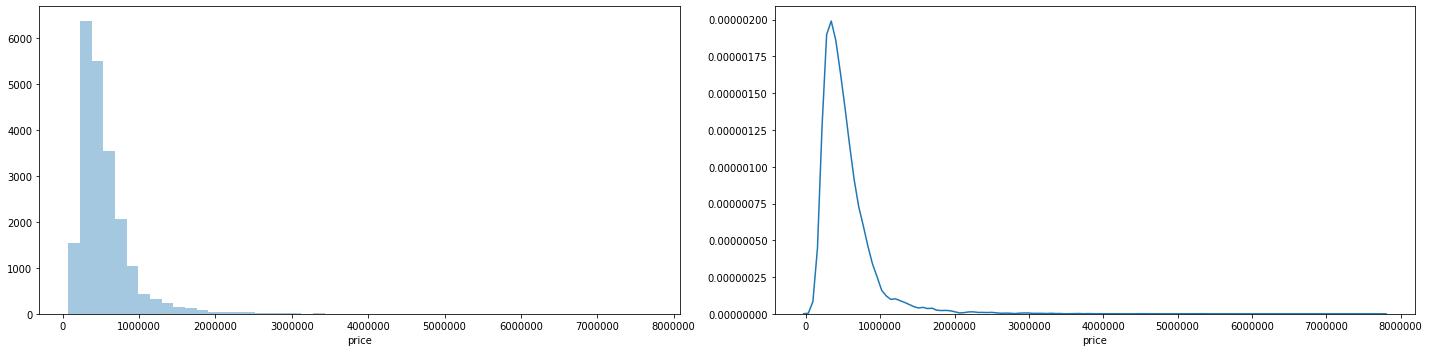

In [11]:
#Target variable price Distribution
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.distplot(df_homeprice['price'], kde=False, ax = ax[0])
sns.distplot(df_homeprice['price'], hist=False,ax = ax[1])
plt.tight_layout()

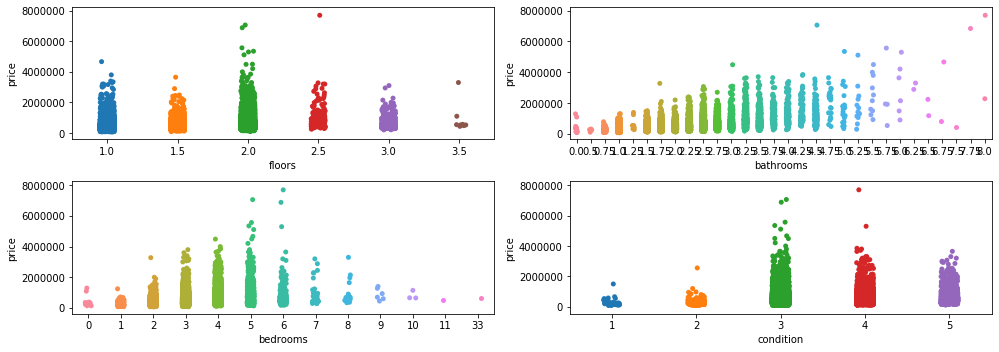

In [12]:
# Stripplots
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(14,5))
sns.stripplot(x='floors',y='price',data = df_homeprice,ax = ax[0][0])
sns.stripplot(x='bathrooms', y='price' ,data=df_homeprice, ax = ax[0][1])
sns.stripplot(x='bedrooms', y='price' ,data=df_homeprice, ax = ax[1][0])
sns.stripplot(x='condition', y='price' ,data=df_homeprice, ax = ax[1][1])
plt.tight_layout()

<b>Observation: </b>  
The prices of houses increases with the number of floors, bedrooms (upto 6) and bathrooms.  
The prices of houses of condition (3 and 4) are high.

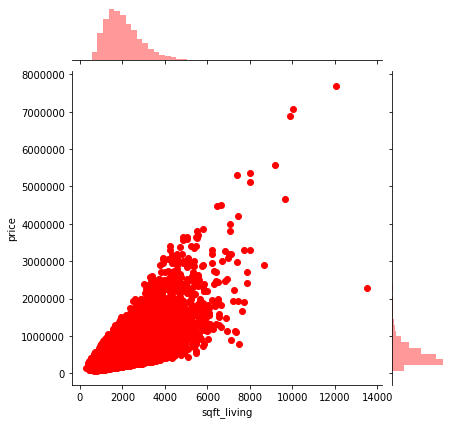

In [13]:
sns.jointplot(x="sqft_living", y="price", data=df_homeprice,color="red") 

<b> Observation: </b>  
As the sqft_living space increased, the prices of houses also increased which is anticipated as floor area and price are directly proportional to each other

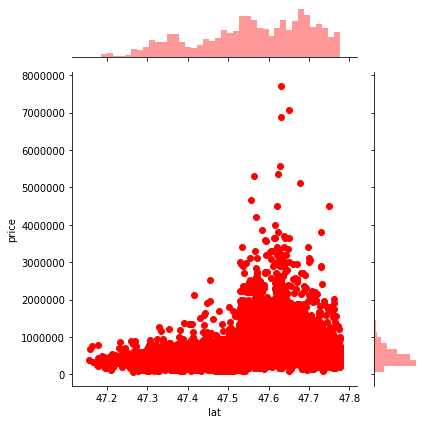

In [14]:
sns.jointplot(x="lat", y="price", data=df_homeprice,color="red")
plt.tight_layout()

<b>Observation:</b>    
The prices of few houses in range of latitute of 47.4 to 47.8 are high.

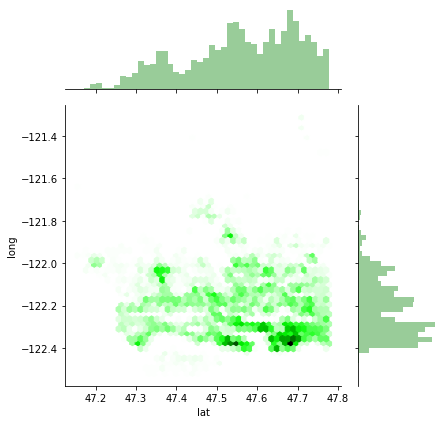

In [15]:
sns.jointplot("lat", "long", df_homeprice, kind='hex',color='g',ratio = 3)

<b>Observation:</b>  
The sales of Houses in lat(47.6 - 47.8) and long(122,4 to -122.0) are high

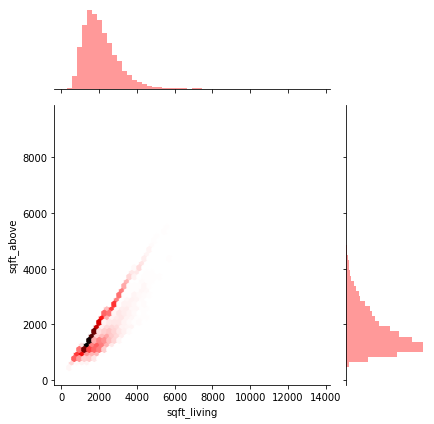

In [16]:
sns.jointplot("sqft_living", "sqft_above", df_homeprice, kind='hex',color='red',ratio = 3)

<b>Observation:</b>  
'sqft_above' increases with sqft_living, they might have high correlation value with respect to each other.

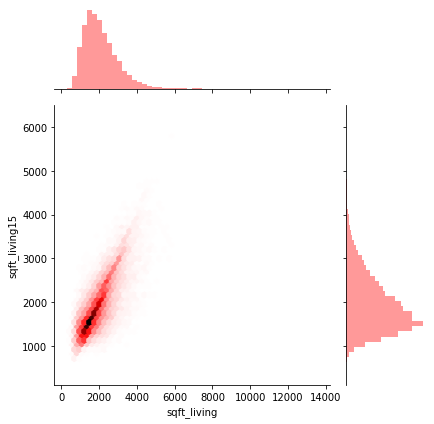

In [17]:
sns.jointplot("sqft_living", "sqft_living15", df_homeprice, kind='hex',color='red',ratio = 3)

<b>Observation:</b>  
'sqft_living' increases with sqft_living15, they might have high correlation value with respect to each other.

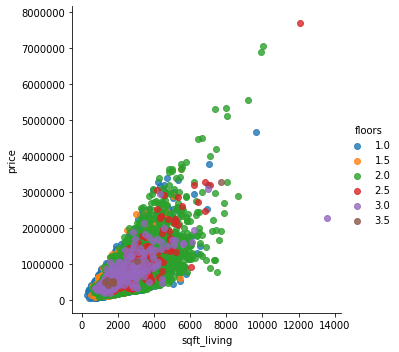

In [18]:
sns.lmplot(x='sqft_living', y='price',data=df_homeprice, hue = 'floors',fit_reg=False)

<b> Observation:</b>  
We can clearly infer from the above graph that the prices of houses with floors = 4 are less when compared with others.

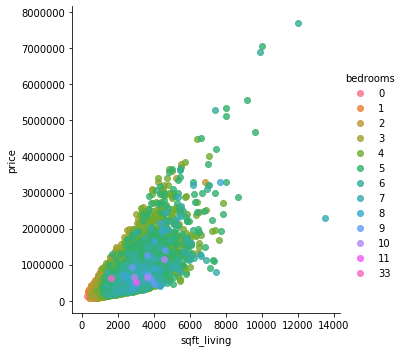

In [19]:
sns.lmplot(x='sqft_living', y='price',data=df_homeprice, hue = 'bedrooms',fit_reg=False)

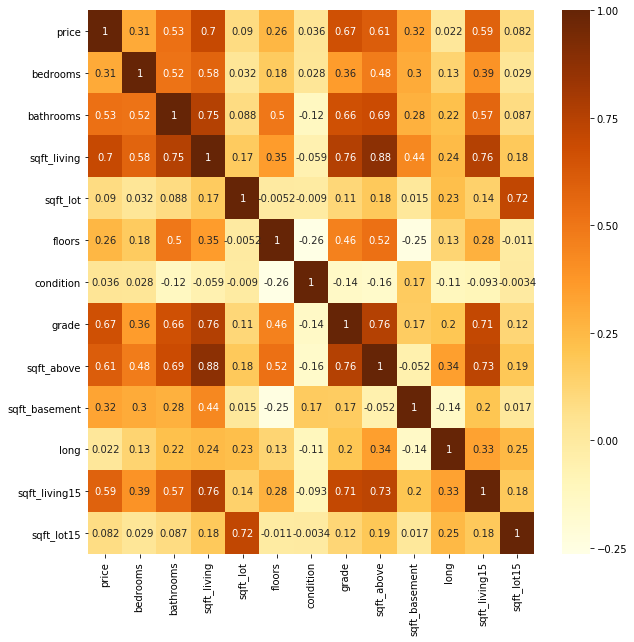

In [20]:
from matplotlib import pyplot
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
cr = df_homeprice.drop(['id','date','lat','waterfront','view','zipcode','yr_renovated','yr_built'],axis = 1).corr()
sns.heatmap(cr,ax = ax,annot=True,cmap = 'YlOrBr')

<b>Observation:</b>  
Outlier Treatment using 1.5 IQR rule  
Rule: Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR.

In [21]:
def benchR_func(q25,q75):
    return (q75 + 1.5*(q75-q25))

def benchL_func(q25,q75):
    return (q25 - 1.5*(q75-q25))

def out_rem(x,benchL,benchR):
    if x>benchR:
        return benchR
    
    elif x<benchL:
        return benchL
    else :
        return x

In [22]:
labels = ['bedrooms','sqft_living','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
for label in labels :
    q25,q75 = q75, q25 = np.percentile(df_homeprice[label], [75,25])
    benchL = benchL_func(q25,q75)
    benchR = benchR_func(q25,q75)
    df_homeprice[label]= df_homeprice[label].apply(lambda row: out_rem(row,benchL,benchR))

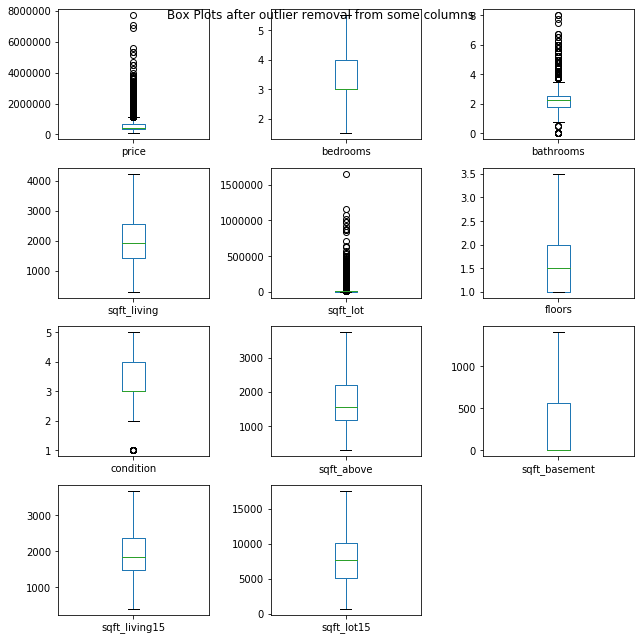

In [23]:
# Box plot after outlier treatment :
df_homeprice.drop(['id','date','waterfront','view','grade','yr_built','zipcode','lat','long','yr_renovated'],axis = 1).plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plots after outlier removal from some columns')
plt.tight_layout()

<b>Preliminary observations:</b>
- Date and Id fields can be dropped as they are of no use to the model.   
- yr_renovated , sqft_lot and sqft_lot15 can also be dropped as most of the houses are renovated around 2000's and sqft_lot and sqft_lot15 contains a lot of zeroes.  
- The target variable price contains significant outliers which need to be handled properly.  
- Anyone of Bedrooms or floors can be dropped as both are similar.  
- sqft_living,sqft_living15 and sqft_above have high correlation value. So,any two of them can be dropped.

## PreProcessing of Data

In [24]:
# Identifying the missing values
df_homeprice.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<b>Observation: </b>  
There are no missing values in the housing dataset

In [25]:
df_homeprice.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<b>Observation: </b>
Columns names are fine, so need to change anything regarding it

In [26]:
# Rounding the values of bathrooms and rooms columns to integers as some of these values are in fractions. 
df_homeprice.bathrooms = df_homeprice.bathrooms.apply(np.round)
df_homeprice.floors = df_homeprice.floors.apply(np.round)

In [27]:
df_homeprice.bathrooms.unique()

array([1., 2., 3., 4., 5., 0., 6., 7., 8.])

In [28]:
df_homeprice.floors.unique()

array([1., 2., 3., 4.])

In [29]:
df_homeprice.waterfront.unique()

array([0, 1])

<b>Columns that can be dropped: </b>  
Id,Date can be dropped as these doesnt affect our model.

In [30]:
(sum(df_homeprice.yr_renovated == 0)/df_homeprice.shape[0])*100

95.77106371165502

<b> The column yr_renovated can also be dropped as 95% of the values contains value as '0'</b>

In [31]:
df_homeprice = df_homeprice.drop(['id', 'date','yr_renovated','sqft_above','sqft_living15','sqft_lot15'],axis=1)

In [32]:
#Applying Z normalization to the data
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler().fit(df_homeprice.iloc[:,:])
homeprice_Z = scaler.transform(df_homeprice.iloc[:,:])# Houseprice_Z contains the Z normalized values of all the record values.

In [34]:
df_homeprice

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       221900.0       3.0        1.0       1180.0      5650     1.0   
1       538000.0       3.0        2.0       2570.0      7242     2.0   
2       180000.0       2.0        1.0        770.0     10000     1.0   
3       604000.0       4.0        3.0       1960.0      5000     1.0   
4       510000.0       3.0        2.0       1680.0      8080     1.0   
5      1225000.0       4.0        4.0       4234.5    101930     1.0   
6       257500.0       3.0        2.0       1715.0      6819     2.0   
7       291850.0       3.0        2.0       1060.0      9711     1.0   
8       229500.0       3.0        1.0       1780.0      7470     1.0   
9       323000.0       3.0        2.0       1890.0      6560     2.0   
10      662500.0       3.0        2.0       3560.0      9796     1.0   
11      468000.0       2.0        1.0       1160.0      6000     1.0   
12      310000.0       3.0        1.0       1430.0     19901     2.0   
13      400000.0       3.0        2.0       1370.0      9680     1.0   
14      530000.0       5.0        2.0       1810.0      4850     2.0   
15      650000.0       4.0        3.0       2950.0      5000     2.0   
16      395000.0       3.0        2.0       1890.0     14040     2.0   
17      485000.0       4.0        1.0       1600.0      4300     2.0   
18      189000.0       2.0        1.0       1200.0      9850     1.0   
19      230000.0       3.0        1.0       1250.0      9774     1.0   
20      385000.0       4.0        2.0       1620.0      4980     1.0   
21     2000000.0       3.0        3.0       3050.0     44867     1.0   
22      285000.0       5.0        2.0       2270.0      6300     2.0   
23      252700.0       2.0        2.0       1070.0      9643     1.0   
24      329000.0       3.0        2.0       2450.0      6500     2.0   
25      233000.0       3.0        2.0       1710.0      4697     2.0   
26      937000.0       3.0        2.0       2450.0      2691     2.0   
27      667000.0       3.0        1.0       1400.0      1581     2.0   
28      438000.0       3.0        2.0       1520.0      6380     1.0   
29      719000.0       4.0        2.0       2570.0      7173     2.0   
...          ...       ...        ...          ...       ...     ...   
21583   399950.0       2.0        1.0        710.0      1157     2.0   
21584   380000.0       3.0        2.0       1260.0       900     2.0   
21585   270000.0       3.0        2.0       1870.0      5000     2.0   
21586   505000.0       2.0        2.0       1430.0      1201     3.0   
21587   385000.0       3.0        2.0       1520.0      1488     3.0   
21588   414500.0       2.0        2.0       1210.0      1278     2.0   
21589   347500.0       3.0        2.0       2540.0      4760     2.0   
21590  1222500.0       4.0        4.0       4234.5      9444     2.0   
21591   572000.0       4.0        3.0       2770.0      3852     2.0   
21592   475000.0       3.0        2.0       1190.0      1200     3.0   
21593  1088000.0       5.0        4.0       4170.0      8142     2.0   
21594   350000.0       4.0        3.0       2500.0      5995     2.0   
21595   520000.0       2.0        2.0       1530.0       981     3.0   
21596   679950.0       5.0        3.0       3600.0      9437     2.0   
21597  1575000.0       4.0        3.0       3410.0     10125     2.0   
21598   541800.0       4.0        2.0       3118.0      7866     2.0   
21599   810000.0       4.0        3.0       3990.0      7838     2.0   
21600  1537000.0       5.0        4.0       4234.5      8088     2.0   
21601   467000.0       3.0        2.0       1425.0      1179     3.0   
21602   224000.0       3.0        2.0       1500.0     11968     1.0   
21603   507250.0       3.0        2.0       2270.0      5536     2.0   
21604   429000.0       3.0        2.0       1490.0      1126     3.0   
21605   610685.0       4.0        2.0       2520.0      6023     2.0   
21606  1007500.0       4.0        4.0       3510.0 

In [35]:
print(homeprice_Z[0:5,:])

[[-0.86671733 -0.42477128 -1.40133068 -1.04621793 -0.22832133 -0.96435549
  -0.08717263 -0.30575946 -0.62918687 -0.55883575 -0.68108575 -0.54489777
   1.87015159 -0.35257175 -0.30607896]
 [-0.00568792 -0.42477128 -0.07771561  0.609947   -0.18988538  0.83832703
  -0.08717263 -0.30575946 -0.62918687 -0.55883575  0.27802057 -0.6810785
   0.87956753  1.16156823 -0.74634143]
 [-0.98084935 -1.59561449 -1.40133068 -1.53472701 -0.12329847 -0.96435549
  -0.08717263 -0.30575946 -0.62918687 -1.40958711 -0.68108575 -1.29389179
  -0.9333882   1.28353661 -0.13565477]
 [ 0.17409044  0.74607193  1.24589945 -0.11685919 -0.2440144  -0.96435549
  -0.08717263 -0.30575946  2.44429394 -0.55883575  1.50088113 -0.20444594
   1.08516045 -0.28328794 -1.271816  ]
 [-0.08195753 -0.42477128 -0.07771561 -0.45047515 -0.16965339 -0.96435549
  -0.08717263 -0.30575946 -0.62918687  0.29191561 -0.68108575  0.54454807
  -0.073636    0.40955019  1.19933466]]


In [36]:
# Seperating Target variable from features
homeprice_target = homeprice_Z[:,0]
homeprice_features = homeprice_Z[:,1:]

In [37]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split

In [38]:
homeprice_features_train, homeprice_features_test, homeprice_target_train, homeprice_target_test = train_test_split(homeprice_features, homeprice_target, test_size=0.2, random_state=40)

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


<b>Least-Squares</b>
- The least squares linear model is a type of algorithm that tries to minimize the sum of the squares of difference of the predicted values minus the actual values for the whole of the training data set.  
  
<b>Least Mean Squares </b>
- The least mean square algorithm uses a technique called “method of steepest descent” and continuously estimates results by updating filter weights. Through the principle of algorithm convergence, the least mean square algorithm provides particular learning curves useful in machine learning theory and implementation.

<b> Implementation of class linear model </b>  
<b>Linear Squares:</b>  
- The train method takes two arguments,Input values X(variables) and target values array T as input.Here in least squares we assume the 1st column value is always 1 in the input array. To find out the best suitable weight array, we take the derivative of the cost function with respect to weight array w and equating it to '0'. The result of the weight array is as follows:  
                         w = (np.linalg.inv(X1.T @ X1) @ X1.T @ T) 
  
- The use method is used to test the trained model. It takes a single array of new input values as input and returns the list of predicted target values as output. 1's are added to the first column of the input values and the target is predicted with the below formula:
                         y = X1 @ self.w
                         
<b>Linear Least Mean Squares:</b>      
- The train function takes two arguments as input params 1.Input values array and the target values array. It iteratively sends a row of both the input arrays to the train_step function. The train_step function first initializes the weight to zeroes array if it is not initialized before. We add 1s column to the row and calculate the new weight using the least mean square formulae :  
                         w = w - alpha(x@w - t)x.T  
- The train_step function updates the weight values as new inputs are given to it until convergence of the cost function. 
- The use function is similar to that of the least square' use method.

### Super Classs Definition

In [39]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [40]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        #N = X.shape[0]
        X1 = self.add_ones(X)
        S = np.linalg.inv(X1.T @ X1)
        R = X1.T @ T
        w = S @ R
        #w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
        self.w = w
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = self.add_ones(X)
        y = X1 @ self.w
        return y

### Least Mean Squares

In [41]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    # zip() is used to map the similar index of multiple containers so that they can be used as a single entity 
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,x.size)
        x1 = self.add_ones(x)
        t = t.reshape(t.size,1)
        
        # Initializing the weights
        if self.w is None:
            self.w = np.zeros((x1.shape[1],1))
            
        y = x1@self.w
        A = (y-t)*x1.T
        self.w = self.w - self.alpha*A
    
    # apply the current model to predict the values
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        Y = X1 @ self.w
        return Y
        
        

### Usage Examples

In [42]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

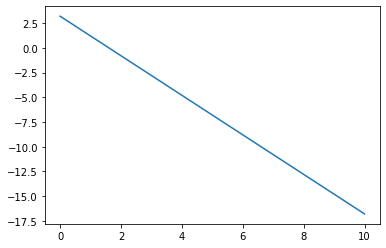

In [43]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

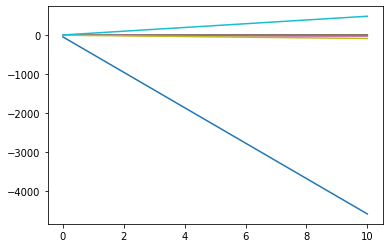

In [44]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

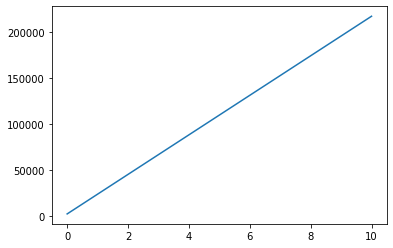

In [45]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


## Least Squares Method

In [46]:
lsp = LinearRegress()
# Training the Least Square model with training data
lsp.train(homeprice_features_train, homeprice_target_train)
# Applying the trained model to test data
homeprice_target_test_predicted = lsp.use(homeprice_features_test)

### Visualization of Results of Least Square Model

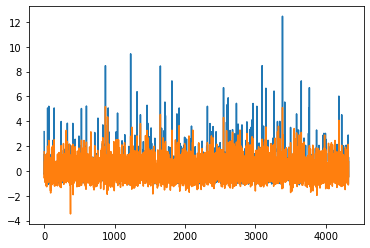

In [47]:
plt.plot(homeprice_target_test)
plt.plot(homeprice_target_test_predicted)

#### Residual Histogram

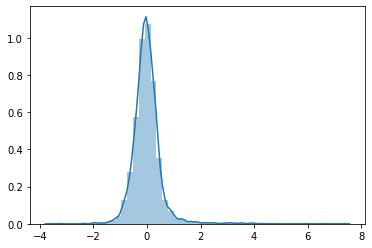

In [48]:
sns.distplot((homeprice_target_test-homeprice_target_test_predicted),bins=50);

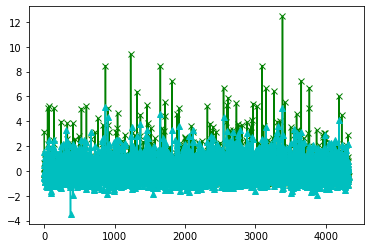

In [49]:
plt.plot(homeprice_target_test, 'g-x')
plt.plot(homeprice_target_test_predicted, 'c-^')

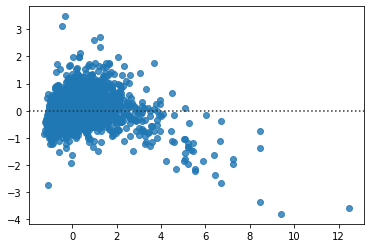

In [50]:
sns.residplot(homeprice_target_test,homeprice_target_test_predicted)

In [51]:
# R Square for least square model
from sklearn.metrics import r2_score

In [52]:
r2_score(homeprice_target_test, homeprice_target_test_predicted)

0.6722976787721635

In [53]:
# RMSE for least square model
np.sqrt(np.mean((homeprice_target_test - homeprice_target_test_predicted)**2))

0.5530561891518868

## Least Mean Squares Method

In [54]:
# Training The LMS Model with a learning rate of 0.0001
lmsp = LMS(0.0001)
# Training the Least Square model with training data
lmsp.train(homeprice_features_train, homeprice_target_train)
#  Applying the trained model to test data
homeprice_target_test_predicted2 = lmsp.use(homeprice_features_test)

### Visualization of Results of Least Mean Square Model

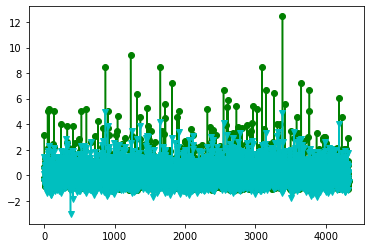

In [55]:
plt.plot(homeprice_target_test, 'g-o')
plt.plot(homeprice_target_test_predicted2, 'c-v')

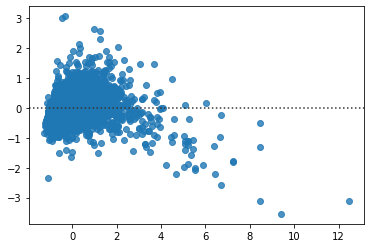

In [56]:
sns.residplot(homeprice_target_test,homeprice_target_test_predicted2)

In [57]:
# R square for least mean square model
r2_score(homeprice_target_test, homeprice_target_test_predicted2)

0.6568867235806135

In [58]:
# RMSE for least mean square model
np.sqrt(np.mean((homeprice_target_test - homeprice_target_test_predicted2)**2))

1.2341365976430971

## Analysis of the algorithms

1. By comparing the visualization plots for predicted and actual values for both algorithms and by checking the r2 and RMS scores for both algorithms, it can be inferred that Least squares algorithm performs better for my dataset. 
2. The least mean square algorithm performs differently for different learning rates. It performs very slow on the test data for alpha in (0.1,0.01). It performs better with decreasing the learning rate to (0.001 or 0.0001)
3. The R2 score is more for least squares(0.69) in comparision to LMS which has score (0.67)
4. The RMSE score is more for LMS(1.24) in comparision to least squares (0.53), hence least score algorithm is the best fit for this dataset.



# Extra Credit work

In [59]:
df_homeprice.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.318192   0.518912     0.647008  0.089661  0.244906   
bedrooms       0.318192  1.000000   0.499824     0.617376  0.034896  0.187786   
bathrooms      0.518912  0.499824   1.000000     0.687523  0.089988  0.326466   
sqft_living    0.647008  0.617376   0.687523     1.000000  0.161559  0.332554   
sqft_lot       0.089661  0.034896   0.089988     0.161559  1.000000 -0.001947   
floors         0.244906  0.187786   0.326466     0.332554 -0.001947  1.000000   
waterfront     0.266369 -0.006033   0.065428     0.086615  0.021604  0.025839   
view           0.397293  0.083230   0.202647     0.266816  0.074710  0.027971   
condition      0.036362  0.024656  -0.066685    -0.059032 -0.008958 -0.223259   
grade          0.667434  0.376167   0.591269     0.759825  0.113621  0.407675   
sqft_basement  0.289682  0.303125   0.318685     0.399561  0.005544 -0.254991   
yr_built       0.054012  0.170449   0.377433     0.333555  0.053080  0.381396   
zipcode       -0.053203 -0.165702  -0.144088    -0.206448 -0.129574 -0.022506   
lat            0.307003 -0.015255   0.049235     0.051303 -0.085683  0.064603   
long           0.021626  0.144781   0.149157     0.251625  0.229521  0.088845   

               waterfront      view  condition     grade  sqft_basement  \
price            0.266369  0.397293   0.036362  0.667434       0.289682   
bedrooms        -0.006033  0.083230   0.024656  0.376167       0.303125   
bathrooms        0.065428  0.202647  -0.066685  0.591269       0.318685   
sqft_living      0.086615  0.266816  -0.059032  0.759825       0.399561   
sqft_lot         0.021604  0.074710  -0.008958  0.113621       0.005544   
floors           0.025839  0.027971  -0.223259  0.407675      -0.254991   
waterfront       1.000000  0.401857   0.016653  0.082775       0.066279   
view             0.401857  1.000000   0.045990  0.251321       0.258710   
condition        0.016653  0.045990   1.000000 -0.144674       0.180115   
grade            0.082775  0.251321  -0.144674  1.000000       0.145504   
sqft_basement    0.066279  0.258710   0.180115  0.145504       1.000000   
yr_built        -0.026161 -0.053440  -0.361417  0.446963      -0.144648   
zipcode          0.030285  0.084827   0.003026 -0.184862       0.086051   
lat             -0.014274  0.006157  -0.014941  0.114084       0.114492   
long            -0.041910 -0.078400  -0.106500  0.198372      -0.156348   

               yr_built   zipcode       lat      long  
price          0.054012 -0.053203  0.307003  0.021626  
bedrooms       0.170449 -0.165702 -0.015255  0.144781  
bathrooms      0.377433 -0.144088  0.049235  0.149157  
sqft_living    0.333555 -0.206448  0.051303  0.251625  
sqft_lot       0.053080 -0.129574 -0.085683  0.229521  
floors         0.381396 -0.022506  0.064603  0.088845  
waterfront    -0.026161  0.030285 -0.014274 -0.041910  
view          -0.053440  0.084827  0.006157 -0.078400  
condition     -0.361417  0.003026 -0.014941 -0.106500  
grade          0.446963 -0.184862  0.114084  0.198372  
sqft_basement -0.144648  0.086051  0.114492 -0.156348  
yr_built       1.000000 -0.346869 -0.148122  0.409356  
zipcode       -0.346869  1.000000  0.267048 -0.564072  
lat           -0.148122  0.267048  1.000000 -0.135512  
long           0.409356 -0.564072 -0.135512  1.000000

<Figure size 1008x1008 with 0 Axes>

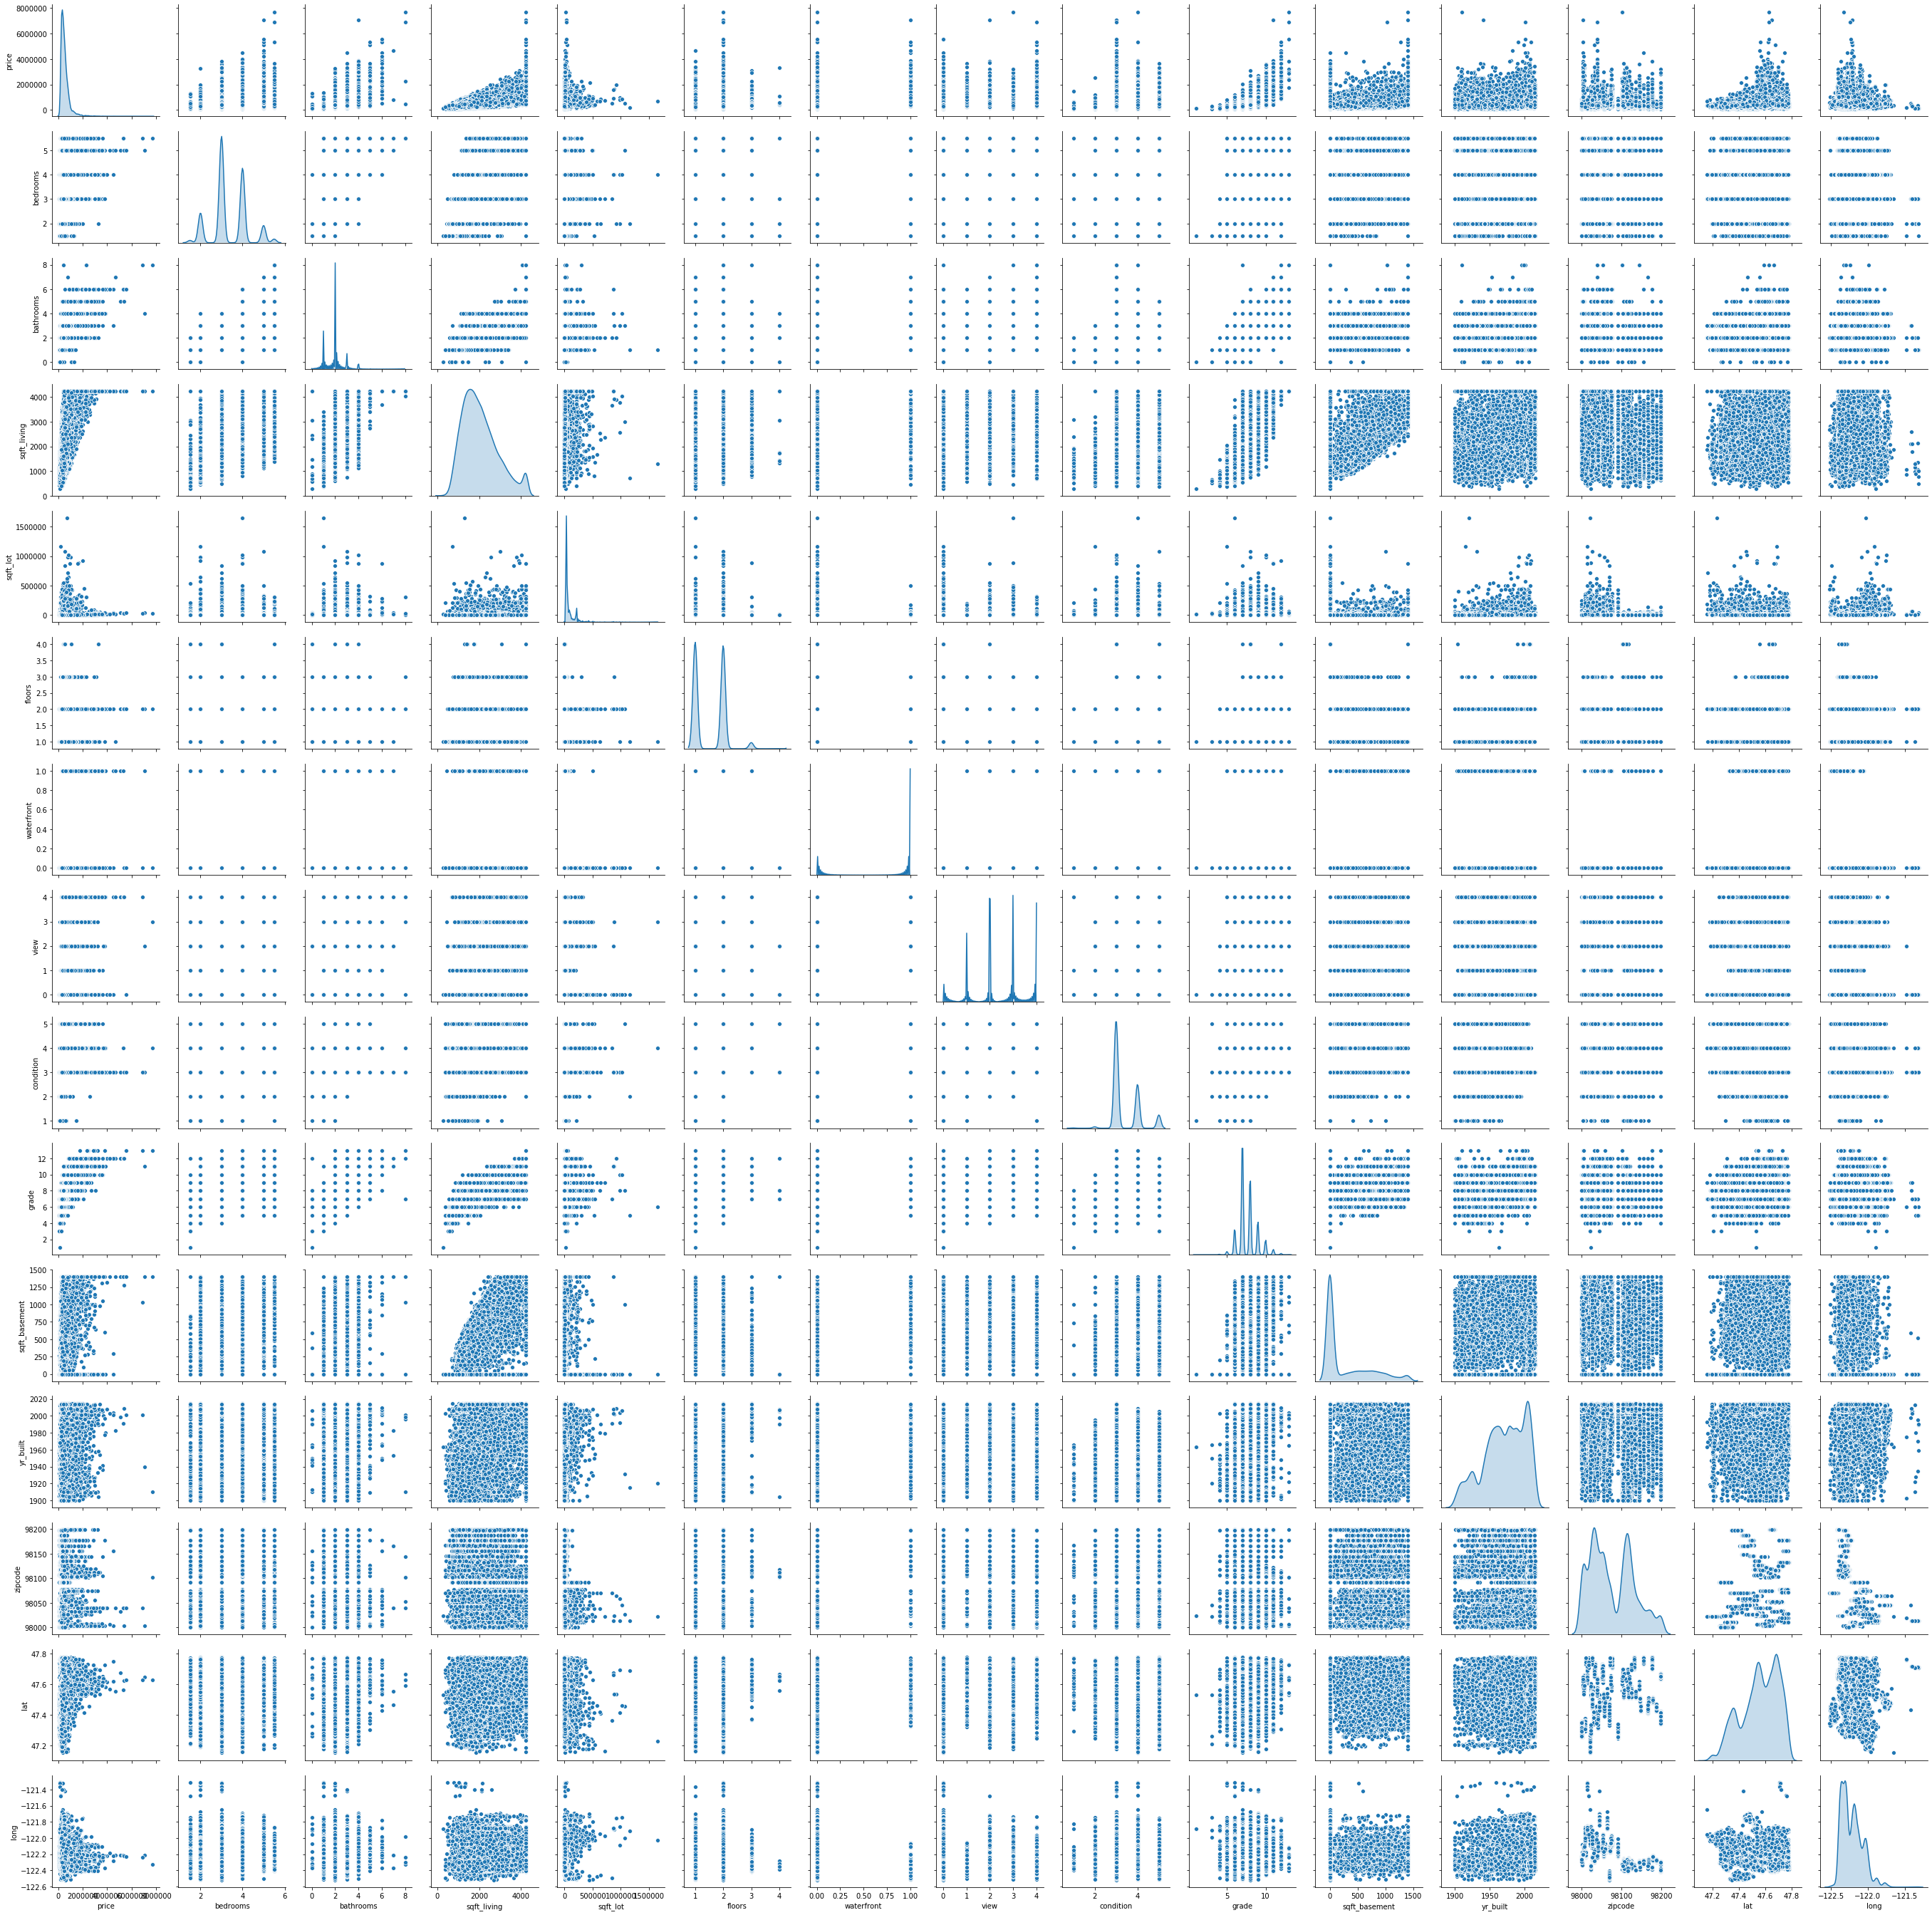

In [60]:
# PairGrid Plot
plt.figure(figsize=(14, 14))

sns.pairplot(df_homeprice, diag_kind='kde')

<b>Observations:</b>  
With the above visualization, coefficient matrix and with the pairplots, The most and the least significant features in predicting the target variables.  
<b>The most significant feature</b> : 1. sqft_living = 0.702035, 2. grade =  0.667434  
<b>The least significant feature</b> : long = 0.021626

## Data Pre-Processing

<b>Dropping the most and least significant features</b>

In [61]:
df_homeprice_remove = df_homeprice.drop(['sqft_living','grade','long'],axis = 1)

In [62]:
scaler = StandardScaler().fit(df_homeprice_remove.iloc[:,:])
homeprice_remove_Z = scaler.transform(df_homeprice_remove.iloc[:,:])# Houseprice_Z contains the Z normalized values of all the record values.

In [63]:
# Seperating Target variable from features
homeprice_remove_target = homeprice_remove_Z[:,0]
homeprice_remove_features = homeprice_remove_Z[:,1:]

In [64]:
homeprice_remove_features_train, homeprice_remove_features_test, homeprice_remove_target_train, homeprice_remove_target_test = train_test_split(homeprice_remove_features, homeprice_remove_target, test_size=0.2, random_state=40)

## Experiments

### Least Squares

In [65]:
lsp = LinearRegress()
# Training the Least Square model with training data
lsp.train(homeprice_remove_features_train, homeprice_remove_target_train)
# Applying the trained model to test data
homeprice_remove_target_test_predicted = lsp.use(homeprice_remove_features_test)

#### Visualization of the prediction

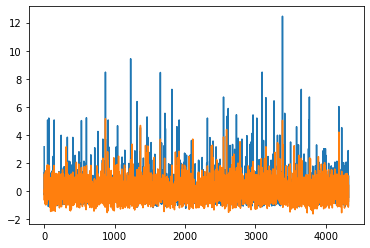

In [66]:
plt.plot(homeprice_remove_target_test)
plt.plot(homeprice_remove_target_test_predicted)

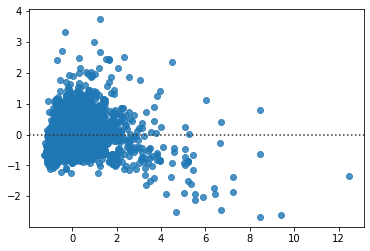

In [67]:
sns.residplot(homeprice_remove_target_test,homeprice_remove_target_test_predicted)

In [68]:
# R2 Score
r2_score(homeprice_remove_target_test, homeprice_remove_target_test_predicted)

0.4946207614048058

In [69]:
# RMSE for least mean square model
np.sqrt(np.mean((homeprice_remove_target_test - homeprice_remove_target_test_predicted)**2))

0.6868125089042385

### Least Mean Squares

In [70]:
# Training The LMS Model with a learning rate of 0.0001
lmsp = LMS(0.0001)
# Training the Least Square model with training data
lmsp.train(homeprice_remove_features_train, homeprice_remove_target_train)
#  Applying the trained model to test data
homeprice_remove_target_test_predicted2 = lmsp.use(homeprice_remove_features_test)

#### Visualization of results of least mean squares

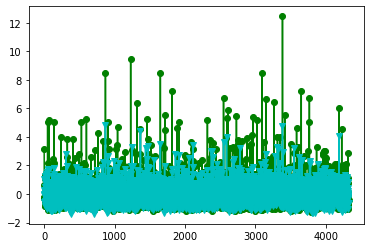

In [71]:
plt.plot(homeprice_remove_target_test, 'g-o')
plt.plot(homeprice_remove_target_test_predicted2, 'c-v')

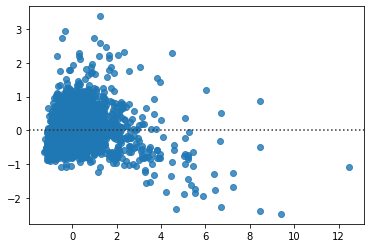

In [72]:
sns.residplot(homeprice_remove_target_test,homeprice_remove_target_test_predicted2)

In [73]:
# R2 Score
r2_score(homeprice_remove_target_test, homeprice_remove_target_test_predicted2)

0.48860681860625554

In [74]:
# RMSE for least mean square model
np.sqrt(np.mean((homeprice_remove_target_test - homeprice_remove_target_test_predicted2)**2))

1.1632477720099863

## Analysis after removing Most and Least Significant features

1. As we removed the most and least impacting features, we can observe that our model fitment with the existing data is a bit diluted in both the algorithms  
2. Even in this case, our model is best fitted with the Least-squares algorithm
3. R2 score of both the algorithms got reduced as we remove these features, R2 score of least square got reduced and is close to 0.5 & R2 score of LMS is less than 0.5
4. RMSE score of least squares is less than that of least mean squares algorithm, which implies least squares is best suited for our dataset.
5. By the above plots we can conclude that we should not drop the features which has most significant values, As this will dilute our model and it causes the reduce in performance of our model

# Conclusions
In this assignment, i have learnt to write the code for algorithms Least squares and Least Mean Squares and apply these algorithms to our pre-processed data and predict the target variables, Visualizing the target variables and analyzing the performance of the model by inference from the plots or predicted and actual values, using R2 score & using RMSE score. During the course of this assignment i have learned normalization & few visualization libraries of the seaborn API. I have faced challenges during pre-processing step as i have categorical variables in my dataset and that needs to be converted to any other which can be applied for our mathematical model.Also, i have analysed our model if the most and least significant features are removed from our datasets. Overall i say its a very good learning through this assignments and this knowledge will help me in my future assignments as well.


# References
1. https://www.techopedia.com/definition/33276/least-mean-square-algorithm-lms-algorithm
2. https://seaborn.pydata.org/tutorial.html
3. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html  
4. https://pandas.pydata.org/  
5. https://www.geeksforgeeks.org/python-data-analysis-using-pandas/  
6. https://www.kaggle.com/harlfoxem/housesalesprediction  
7. https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed  

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [75]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
